# Exploratory Data Analysis and Prediction of Udemy

## Udemy Visualizations and ML models with scikit-learn
* ### Visualizations: Seaborn and matplotlib
* ### ML models: Linear Regression and RandomForestRegressor 
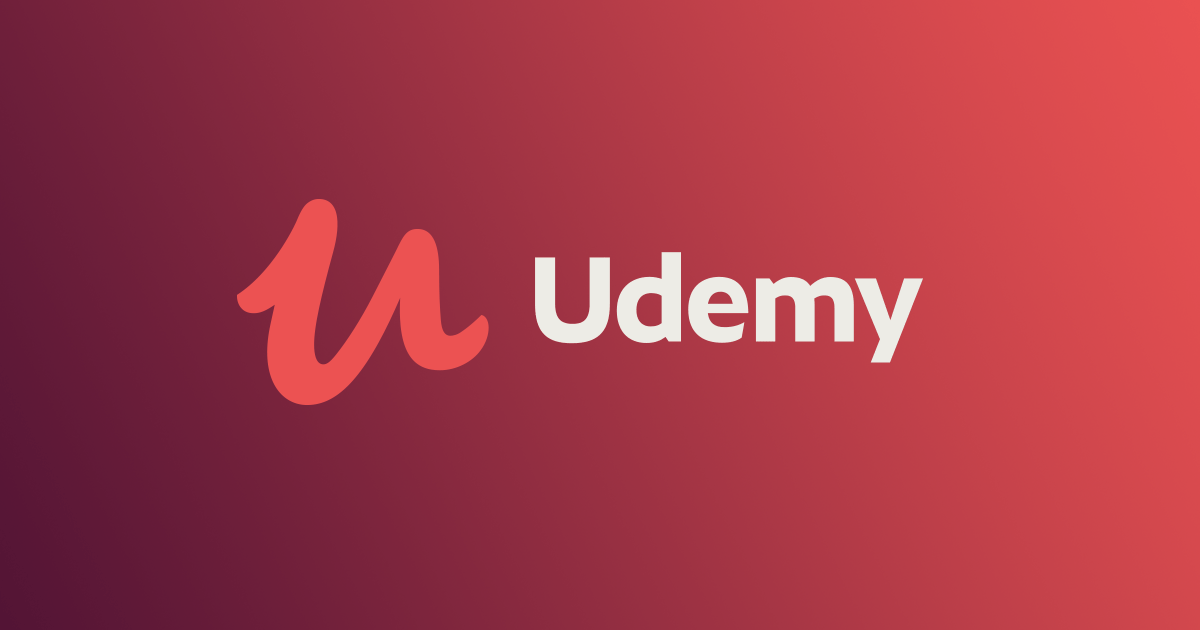

Udemy, founded in May 2010, is an American online learning platform aimed at professional adults and students. As of Jan 2020, the platform has more than 50 million students and 57,000 instructors teaching courses in over 65 languages. There have been over 295 million course enrollments. Students and instructors come from 190+ countries and 2/3 of the students are located outside of the U.S.

Students take courses largely as a means of improving job-related skills.Some courses generate credit toward technical certification. Udemy has made a special effort to attract corporate trainers seeking to create coursework for employees of their company.As of 2020, there are more than 150,000 courses on the website.



Source: https://en.wikipedia.org/wiki/Udemy

<font color = 'blue'>
Contents:
1. [Importing libraries](#1)
1. [Load and Check Data](#2)
    * [How many course we have?](#3)
    * [How many unique variable we have?](#4)
1. [Visualizations](#5)
1. [Basic Preproccessing](#8)
    * [Label Encoding](#9)
    * [one-hot encoding](#10)
1. [Modelling](#11)
    * [preparing data for train test split](#12)
    * [train test split](#13)
    * [Linear regression](#14)
    * [RandomForestRegressor](#15)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = '1'> </a> </br>
# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<a id = '2'> </a> </br>
# Load and Check Data

In [ ]:
udemy_data = pd.read_csv('/kaggle/input/udemy-courses/udemy_courses.csv')
udemy_data.head()

In [ ]:
udemy_data.info()

In [ ]:
udemy_data.columns

In [ ]:
udemy_data.describe()

<a id = '3'> </a> </br>
# How many course we have?

In [ ]:
subject_col = udemy_data['subject'].value_counts()
subject_col

<a id = '4'> </a> </br>
# How many unique variable we have?

In [ ]:
categorical_df = udemy_data.select_dtypes(include=["object"])

In [ ]:
categorical_df.subject.unique()

In [ ]:
categorical_df.level.unique()

<a id = '5'> </a> </br>
# Visualizations
* plots
* scatter
* heatmap

In [ ]:
subject_col.plot.barh(color='lightblue');

In [ ]:
sns.distplot(udemy_data.price, bins=10, kde=False);

In [ ]:
sns.barplot(x = "level", y = "price", hue = "subject", data = udemy_data,ci = None)
plt.show()

In [ ]:
g = sns.catplot(x="price", aspect=3, data=udemy_data, kind="count")
g.fig.suptitle("price Counts", y=1.0)
plt.show()

In [ ]:
sns.relplot(x="price", y="num_subscribers", data=udemy_data, kind="line", aspect=4, ci="sd")
plt.show()

In [ ]:
sns.distplot(udemy_data.price, bins=10)

In [ ]:
sns.kdeplot(udemy_data.price, shade = True)

In [ ]:
sns.catplot(x = "subject", y = "price", kind="violin",aspect=3, data = udemy_data,);

In [ ]:
# 3.cu icin hue
sns.catplot(x = "subject", y = "price", hue="level", kind="violin", aspect=3, data = udemy_data);

In [ ]:
sns.catplot(x = "price", y = "level", hue = "subject", kind = "point", data = udemy_data);

# scatter

In [ ]:
sns.scatterplot(x = "price", y = "subject", hue = "level", data = udemy_data);

In [ ]:
sns.relplot(x="num_reviews", y="num_subscribers",aspect=3, data=udemy_data, kind="scatter")
plt.show()

# heatmap

In [ ]:
sns.set_palette("RdBu")
correlation=udemy_data.corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:

sns.lmplot(x = "price", y = "num_subscribers", hue = "level", data=udemy_data);

In [ ]:
sns.boxplot(x = udemy_data["price"]);

In [ ]:
sns.boxplot(x = "level", y = "price", data = udemy_data);

In [ ]:
sns.boxplot(x = "level", y = "price", hue="subject", data = udemy_data)

In [ ]:
fig, ax = plt.subplots()
ax.hist(udemy_data.level, label="price", bins=10)
ax.set_xlabel("level")
ax.set_ylabel("price")
plt.show()

# is_paid categorical variable frequency

In [ ]:
sns.catplot(x="is_paid",data=udemy_data, kind="count")
plt.show()

In [ ]:
sns.lmplot(x = "num_subscribers",y="num_reviews", hue = "subject", data=udemy_data);

In [ ]:
sns.lineplot(x = "price", y = "num_subscribers", hue="subject", data = udemy_data);

<a id = '8'> </a> </br>
# Preproccessing
* How to label encoding
* How to get one-hot encoding

In [ ]:
# we dont have NaN value
df_for_model.isna().sum().sum()

In [ ]:
df_for_model = udemy_data.copy()

<a id = '9'> </a> </br>
# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_le = df_for_model.copy()
le.fit(df_le["level"])

In [ ]:
list(le.classes_)

<a id = '10'> </a> </br>
## one-hot encoding

In [ ]:
pd.get_dummies(df_for_model["level"])

<a id = '11'> </a> </br>
# Modelling 
* ## Reviews prediction by subscribers
* preparing data for train test split
* train test split
* Linear regression
* RandomForestRegressor

<a id = '12'> </a> </br>
### Preparing data for train test split

In [ ]:
X = df_for_model['num_subscribers'].values
y = df_for_model['num_reviews'].values

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

<a id = '13'> </a> </br>
### train_test_split

In [ ]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<a id = '14'> </a> </br>
### LinearRegression

In [ ]:
# !!! DO NOT FORGET TO LIBRARIES
reg = LinearRegression()

reg.fit(X_train,y_train)
preds = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print(rmse)
print('Score',reg.score(X_test,y_test))

* <a id = '15'> </a> </br>
### RandomForestRegressor

In [ ]:
# !!! DO NOT FORGET TO LIBRARIES


# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#Score
print("Score :",rf.score(X_test, y_test))